<a href="https://colab.research.google.com/github/AdrianaCaetano/Data_Analysis_with_Python/blob/main/Projects/Medical_Data_Visualizer/medical_examination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### Features and value types

Integer values: 
- age: days 

- height: centimiters
- weight: kilograms
- ap_hi: Systolic blood pressure
- ap_lo: Diastolic blood pressure


Categorical Values: 
- sex: 1, 2, 3 (genders are not specified)
- cholesterol: 1= normal, 2= above normal, 3= well above normal
- gluc: 1= normal, 2= above normal, 3= well above normal

Binary values: 
- smoke
- alco: Alcohol intake
- active: Physical activity
- cardio: Presence or absence of cardiovascular disease

In [7]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# Add an overweight column by calcultating their BMI 
# BMI = weight (Kg) / squared height (m) -> any value above 25 is overweight
# 0: NOT overweight, 1: overweight

df['overweight'] = df['weight']/(df['height']/100)**2
#df['overweight'] = df['overweight'].apply(lambda x: 0 if x < 25 else 1)
df['overweight'] = np.where(df['overweight'] < 25, 0, 1)

df['overweight'].value_counts()

1    43560
0    26440
Name: overweight, dtype: int64

In [21]:
# Normalize the data by making 0 always good and 1 always bad. 

df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)

df['cholesterol'].value_counts()

1    52385
0    17615
Name: cholesterol, dtype: int64

## Clean the Data

Filter out the following patient segments that represent incorrect data

In [29]:
df.shape

(70000, 14)

In [30]:
# diastolic pressure is higher than systolic
df_clean = df[(df['ap_lo'] <= df['ap_hi'])]
df_clean.shape

(68766, 14)

In [31]:
# height is less than the 2.5th percentile
df_clean = df_clean[df_clean['height'] >= df_clean['height'].quantile(0.025)]
df_clean.shape

(67260, 14)

In [32]:
# height is more than the 97.5th percentile
df_clean = df_clean[df_clean['height'] <= df_clean['height'].quantile(0.975)]
df_clean.shape 

(65859, 14)

In [33]:
# weight is less than the 2.5th percentile
df_clean = df_clean[df_clean['weight'] >= df_clean['weight'].quantile(0.025)]
df_clean.shape

(64384, 14)

In [34]:
# weight is more than the 97.5th percentile
df_clean = df_clean[df_clean['weight'] <= df_clean['weight'].quantile(0.975)]
df_clean.shape

(62784, 14)

In [40]:
df_clean.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'],
      dtype='object')

## Visualize the Data

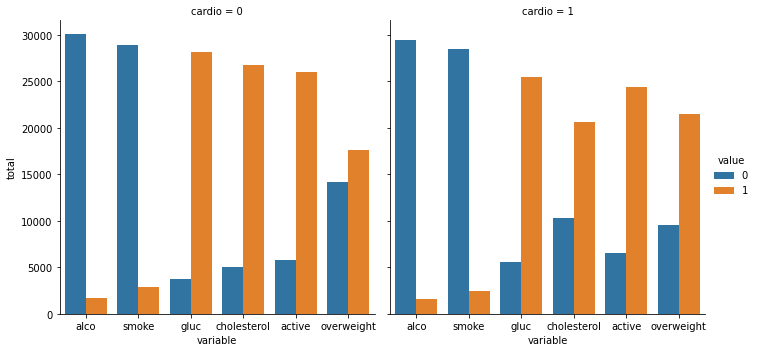

In [70]:
# Convert the data into long format and create a chart that shows the value counts of the categorical features 
# using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value.

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 
    # 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'
    df_cat = pd.melt(df_clean, 
                     id_vars=['cardio'], 
                     value_vars= ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
                     )
    
    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
    # You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.value_counts().reset_index(name="total")
    
    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(data=df_cat,
                x='variable',
                y='total',
                hue='value',
                col='cardio',
                kind='bar', # “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”
                )

    # # Get the figure for the output
    #fig = set(ylabel = 'total')

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()

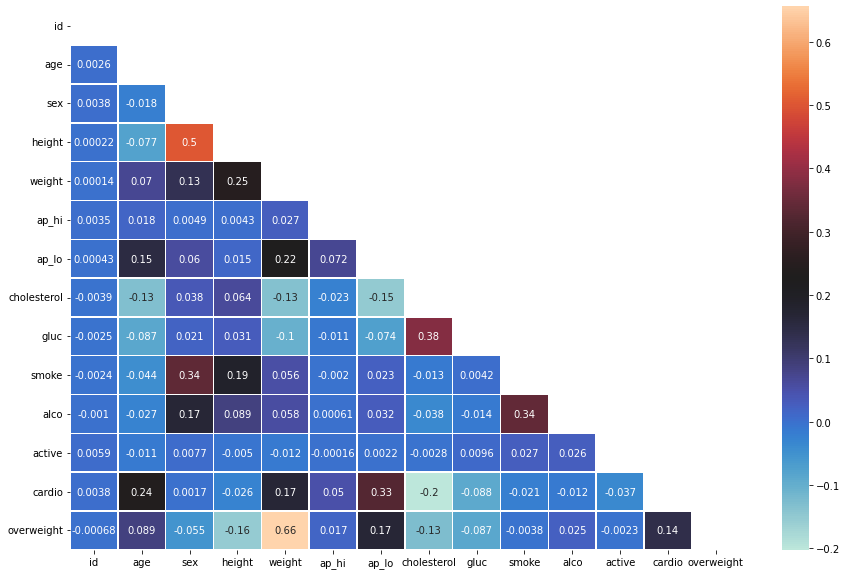

In [77]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data   
    df_heat = df.loc[
        (df["ap_lo"] <= df["ap_hi"])
        & (df["height"] >= df["height"].quantile(0.025))
        & (df["height"] <= df["height"].quantile(0.975))
        & (df["weight"] >= df["weight"].quantile(0.025))
        & (df["weight"] <= df["weight"].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr_matrix = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr_matrix) # Return a copy of an array with the elements below the k-th diagonal zeroed

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(15, 10))

    # Draw the heatmap with 'sns.heatmap()'
    fig = sns.heatmap(
        corr_matrix,
        cmap = 'icefire', # 'icefire', 'vlag','viridis'
        annot= True,
        linewidths=0.5,
        mask = mask,
    )

    # Do not modify the next two lines
    #fig.savefig('heatmap.png')
    return fig

draw_heat_map()

The higher correlations are easily visualized in the heatmap, with high corelations among glucose and cholesterol, gender and smoke, alcohol comsumption and smoking, cardio diseases and diastolic blood pressure, cardio diseases and age. 